In [17]:
from pathlib import Path

import yaml
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data_dir = Path("/run/media/nathan/Nathan4T/Nathan-canarygan/reports/normalization")

In [19]:
files = sorted(data_dir.rglob("**/*.csv"))

dfs = []
for f in files:
    df = pd.read_csv(f)
    dfs.append(df)

df = pd.concat(dfs).reset_index(drop=True)
df.head()

,file,version,epoch,y,z,kind,data_dir,gen_dir,save_dir,features,...,d_knn_nfeat,c_knn_feat,c_knn_spec,c_knn_nfeat,d_svm_feat,d_svm_spec,d_svm_nfeat,c_svm_feat,c_svm_spec,c_svm_nfeat
0,/beegfs/ntrouvai/canarygan/generation/version_...,16,989,EARLY_1120,[-0.46099603 0.18326902 -0.16222906],gen,/beegfs/ntrouvai/canarygan/decoder/dataset,/beegfs/ntrouvai/canarygan/generation,/beegfs/ntrouvai/canarygan/normalization,base,...,3309.051468,NaN,NaN,0.669064,NaN,NaN,3317.094523,NaN,NaN,0.999327
1,/beegfs/ntrouvai/canarygan/generation/version_...,16,989,WN,[ 0.9258987 -0.5671967 -0.2333256],gen,/beegfs/ntrouvai/canarygan/decoder/dataset,/beegfs/ntrouvai/canarygan/generation,/beegfs/ntrouvai/canarygan/normalization,base,...,3652.245641,NaN,NaN,0.633166,NaN,NaN,3661.086906,NaN,NaN,0.999274
2,/beegfs/ntrouvai/canarygan/generation/version_...,16,989,EARLY_False,[ 0.80619407 0.10450101 -0.39855385],gen,/beegfs/ntrouvai/canarygan/decoder/dataset,/beegfs/ntrouvai/canarygan/generation,/beegfs/ntrouvai/canarygan/normalization,base,...,4019.677058,0.006752,0.126117,0.627801,616.011518,9.870870,4028.843487,0.006752,0.126117,1.003874
3,/beegfs/ntrouvai/canarygan/generation/version_...,16,989,EARLY_7401,[ 0.23247671 -0.16978633 0.3741995 ],gen,/beegfs/ntrouvai/canarygan/decoder/dataset,/beegfs/ntrouvai/canarygan/generation,/beegfs/ntrouvai/canarygan/normalization,base,...,2769.884790,NaN,NaN,0.687575,NaN,NaN,2778.237233,NaN,NaN,1.013125
4,/beegfs/ntrouvai/canarygan/generation/version_...,16,989,EARLY_False,[0.76516044 0.859859 0.8346361 ],gen,/beegfs/ntrouvai/canarygan/decoder/dataset,/beegfs/ntrouvai/canarygan/generation,/beegfs/ntrouvai/canarygan/normalization,base,...,3853.739332,0.026149,0.394195,0.658273,879.683436,19.167543,3861.963134,0.026149,0.394195,0.998786


In [20]:
df.features

0         base
1         base
2         base
3         base
4         base
          ... 
119995    spec
119996    spec
119997    spec
119998    spec
119999    spec
Name: features, Length: 120000, dtype: object

In [21]:
features = sorted(df.features.unique())
features

['base', 'deltas', 'mel', 'spec']

In [22]:
labels = sorted(list(df.knn_y.unique()))
reals = [l for l in labels if "EARLY" not in l and "WN" not in l]
fakes = sorted(set(labels) - set(reals))
reals, fakes

(['A',
  'B1',
  'B2',
  'C',
  'D',
  'E',
  'H',
  'J1',
  'J2',
  'L',
  'M',
  'N',
  'O',
  'Q',
  'R',
  'V'],
 ['EARLY_15', 'EARLY_30', 'EARLY_45', 'WN'])

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


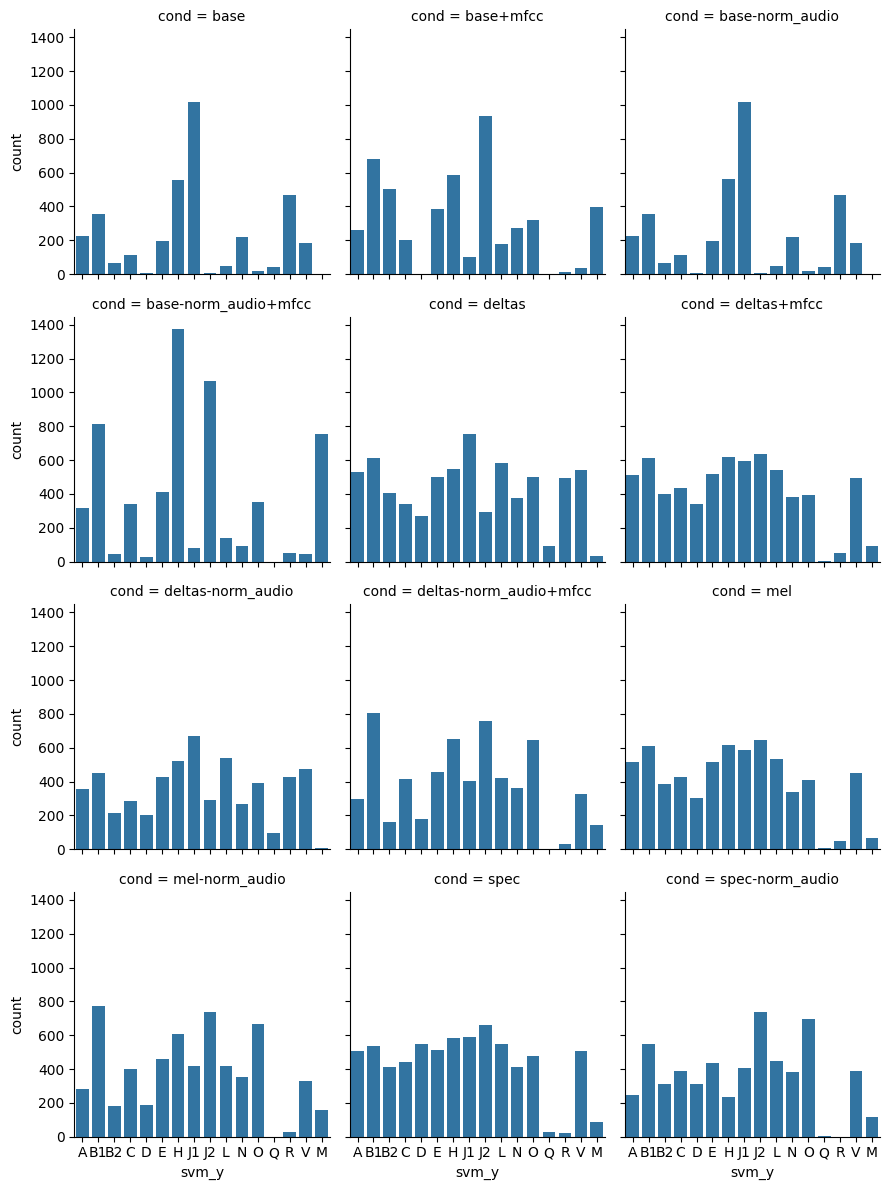

In [23]:
g = sns.FacetGrid(df.query("svm_y in @reals").sort_values(by=["cond", "svm_y"]), col="cond", col_wrap=3)
g.map(sns.countplot, "svm_y")
plt.savefig("../reports/normalization/class_distr_svm_y.png", bbox_inches="tight")

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


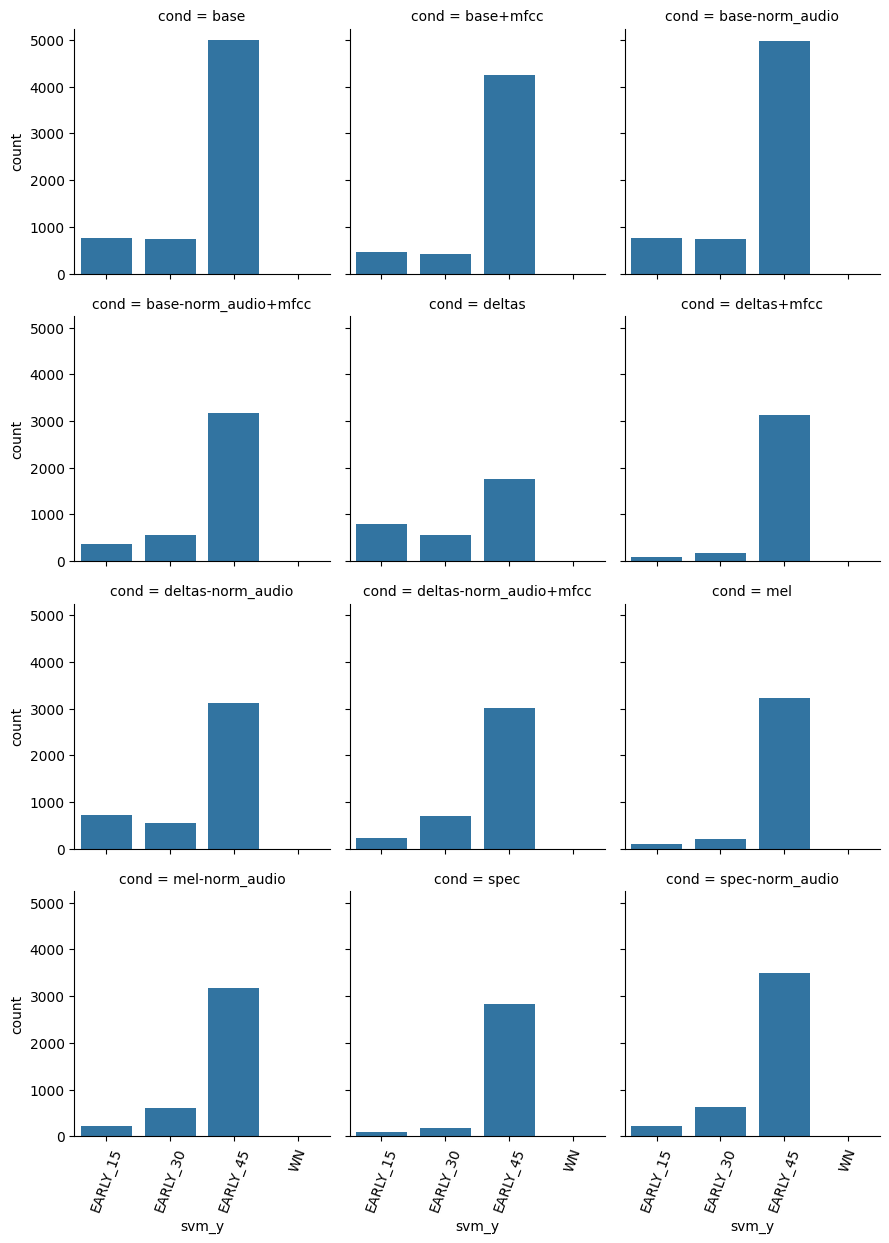

In [24]:
g = sns.FacetGrid(df.query("svm_y in @fakes").sort_values(by=["cond", "svm_y"]), col="cond", col_wrap=3)
g.map(sns.countplot, "svm_y")
for ax in g.axes.flat:
    ax.tick_params(axis='x', which='both', rotation=70)
plt.savefig("../reports/normalization/fake_distr_svm_y.png", bbox_inches="tight")

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


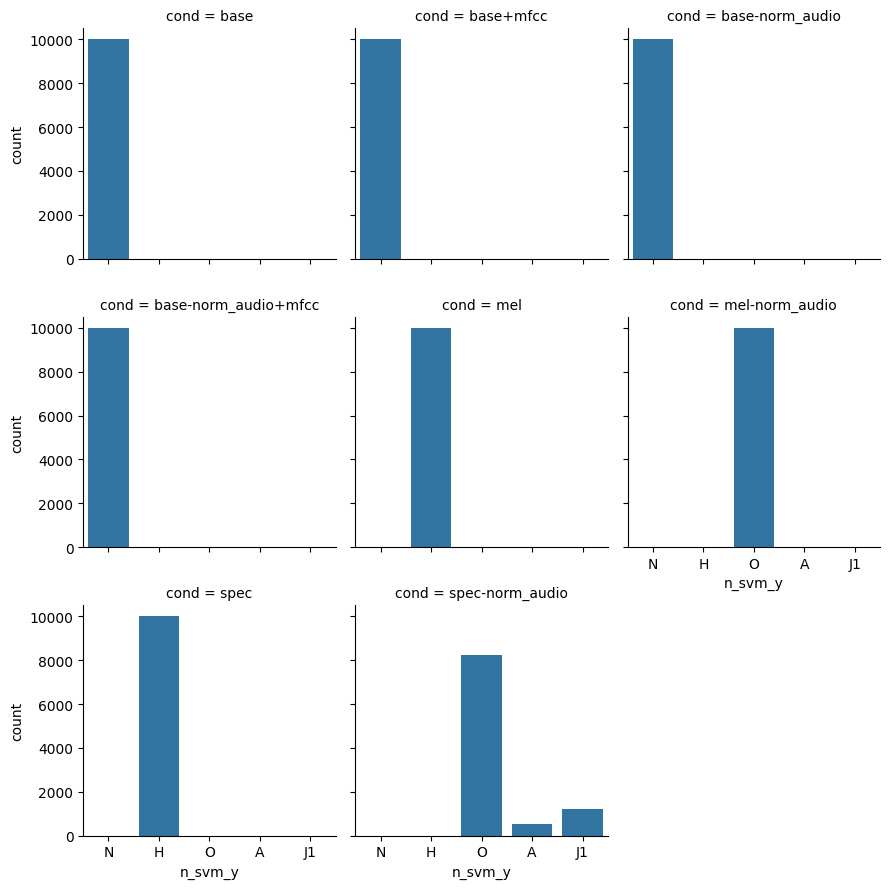

In [25]:
g = sns.FacetGrid(df.query("n_svm_y in @reals").sort_values(by=["cond", "n_svm_y"]), col="cond", col_wrap=3)
g.map(sns.countplot, "n_svm_y")
plt.savefig("../reports/normalization/class_distr_n_svm_y.png", bbox_inches="tight")

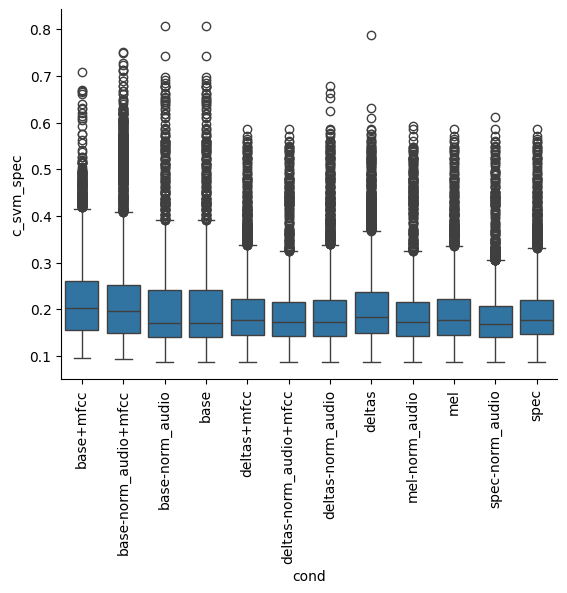

In [26]:
plt.figure()
sns.boxplot(df[df["c_svm_spec"] != np.nan], x="cond", y="c_svm_spec")
sns.despine()
plt.xticks(rotation=90)
plt.savefig("../reports/normalization/corr_svm_spec.png", bbox_inches="tight")
plt.show()

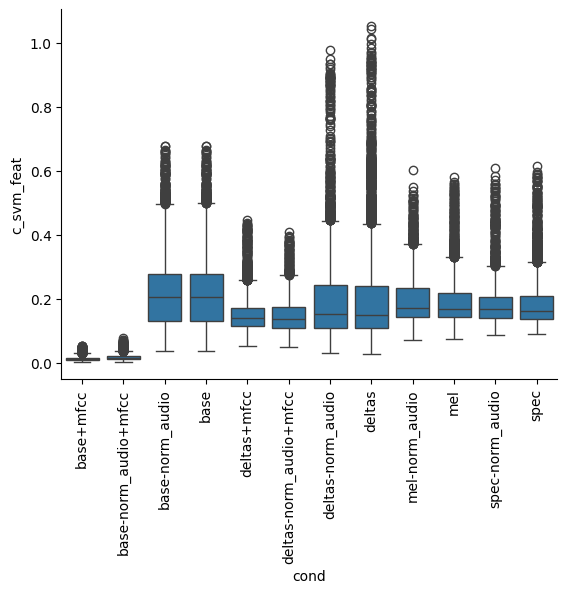

In [27]:
plt.figure()
sns.boxplot(df[df["c_svm_feat"] != np.nan], x="cond", y="c_svm_feat")
sns.despine()
plt.xticks(rotation=90)
plt.savefig("../reports/normalization/corr_svm_feat.png", bbox_inches="tight")
plt.show()

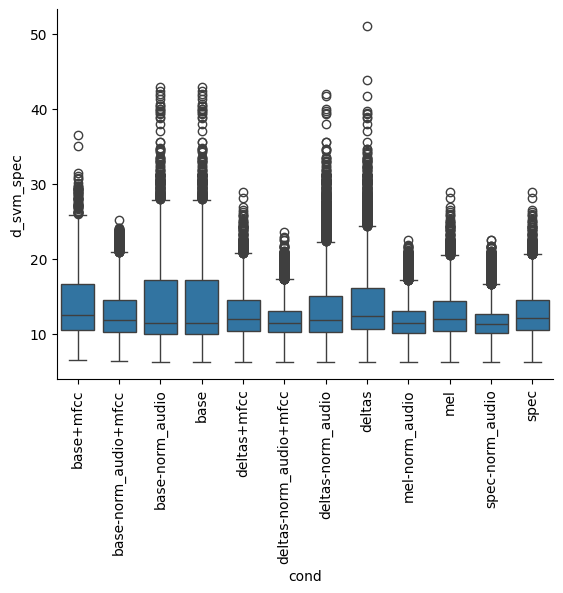

In [28]:
plt.figure()
sns.boxplot(df[df["d_svm_spec"] != np.nan], x="cond", y="d_svm_spec")
sns.despine()
plt.xticks(rotation=90)
plt.savefig("../reports/normalization/d_svm_spec.png", bbox_inches="tight")
plt.show()

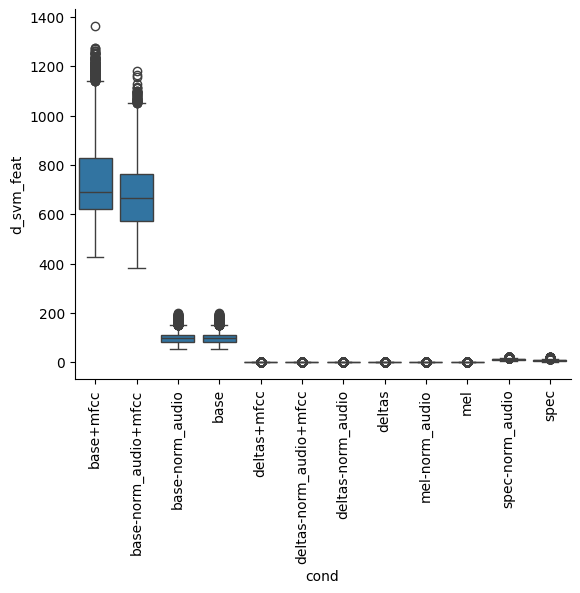

In [29]:
plt.figure()
sns.boxplot(df[df["d_svm_feat"] != np.nan], x="cond", y="d_svm_feat")
plt.xticks(rotation=90)
sns.despine()
plt.savefig("../reports/normalization/d_svm_feat.png", bbox_inches="tight")
plt.show()
